In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/wine.csv"
df = pd.read_csv(url)
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [133]:
print(df.columns)

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')


In [135]:
# 레이블 갯수 확인 (숫자)
df['Alcohol'].value_counts()

Alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: count, Length: 126, dtype: int64

In [137]:
# 결측치 확인
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [145]:
# 원-핫 인코딩
y = pd.get_dummies(y).values

In [141]:
y = df.iloc[:, 0].values  
X = df.iloc[:, 1:].values 

In [147]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y)

(142, 13) (142, 3)
(36, 13) (36, 3)
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False

In [155]:
# 딥러닝 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(y_train.shape[1], activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split = 0.1)

model.summary()

Epoch 1/30


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3357 - loss: 1.1342 - val_accuracy: 0.6667 - val_loss: 1.0470
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5831 - loss: 1.0439 - val_accuracy: 0.7333 - val_loss: 0.9792
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6939 - loss: 1.0037 - val_accuracy: 0.9333 - val_loss: 0.9255
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8275 - loss: 0.9502 - val_accuracy: 1.0000 - val_loss: 0.8630
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8193 - loss: 0.8876 - val_accuracy: 1.0000 - val_loss: 0.7975
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8912 - loss: 0.8218 - val_accuracy: 0.9333 - val_loss: 0.7270
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8590 - loss: 0.7543 - val_accuracy: 0.9333 - val_loss: 0.6553
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8621 - loss: 0.7004 - val_accuracy: 0.9333 - val_loss: 0.5857
Epoch 9/30
4/4 ━━━

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,835 (54.05 KB)

 Trainable params: 4,611 (18.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,224 (36.04 KB)

In [157]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


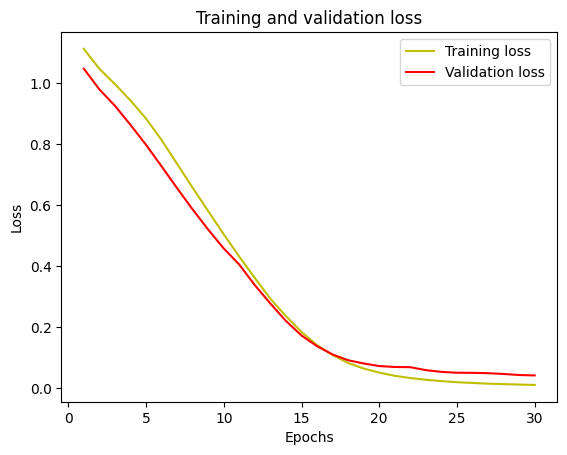

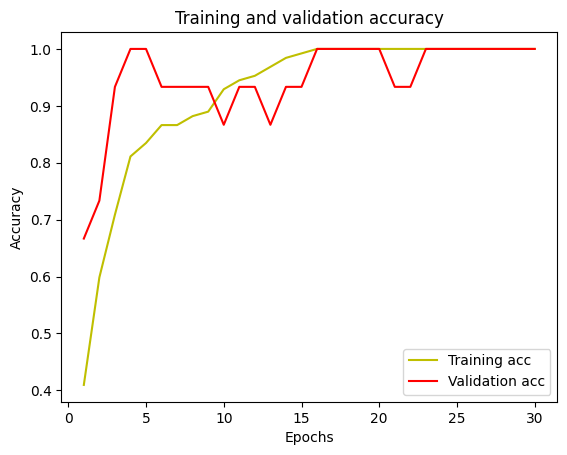

In [159]:
# 학습 과정 시각화
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()